## Problem statement: To find the Litracy rates in India in the future.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot
import sklearn

In [3]:
data=pd.read_csv("2015_16_Statewise_Secondary.csv") # getting the data
data.head() # printing first 10 rows

,ac_year,statcd,statname,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,...,tchmed_nr,tchoth_nr,tchse_nr,tchnr_nr,enrc7_py,enrc8_py,enrc9_py,enrc10_py,enr11_py,enr12_py
0,2015-16,1,Jammu And Kashmir,222236.0,12548.93,20.05,23.71,883.0,7.4,11.9,...,0,0,0,0,199954,203537,192567,146066,138963,116187
1,2015-16,2,Himachal Pradesh,55673.0,6856.51,8.69,12.81,974.0,25.2,5.7,...,0,0,0,0,122101,122413,130258,135253,119932,98924
2,2015-16,3,Punjab,50362.0,27704.24,29.82,13.73,893.0,31.9,0.0,...,0,0,0,0,481982,473349,451412,426034,351639,342835
3,2015-16,4,Chandigarh,114.0,1054.69,76.66,17.10,818.0,18.9,0.0,...,0,0,0,0,21344,21321,21545,16708,20948,17943
4,2015-16,5,Uttarakhand,53483.0,10116.75,21.54,19.17,963.0,18.8,2.9,...,0,0,0,0,193393,193890,197590,200769,150799,162100


In [4]:
data.iloc[0:10,0:20] # printing first 10 rows and 20 columns

,ac_year,statcd,statname,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,literacy_rate,male_literacy_rate,female_literacy_rate,distcd,blkcd,villages,clusters,schools,sch_1,sch_2
0,2015-16,1,Jammu And Kashmir,222236.0,12548.93,20.05,23.71,883.0,7.4,11.9,68.74,78.26,58.01,22,201,7263,1628,4202,486,95
1,2015-16,2,Himachal Pradesh,55673.0,6856.51,8.69,12.81,974.0,25.2,5.7,83.78,90.83,76.60,12,124,10120,2243,3782,565,1634
2,2015-16,3,Punjab,50362.0,27704.24,29.82,13.73,893.0,31.9,0.0,76.68,81.48,71.34,22,146,13195,1782,9171,2593,1754
3,2015-16,4,Chandigarh,114.0,1054.69,76.66,17.10,818.0,18.9,0.0,86.43,90.54,81.38,1,20,84,20,160,85,5
4,2015-16,5,Uttarakhand,53483.0,10116.75,21.54,19.17,963.0,18.8,2.9,79.63,88.33,70.70,13,95,11989,995,3512,487,1600
5,2015-16,6,Haryana,44212.0,25353.08,24.12,19.90,877.0,20.2,0.0,76.64,85.38,66.77,21,126,7438,1523,7663,2329,1924
6,2015-16,7,Delhi,1483.0,16753.24,77.03,20.96,866.0,16.8,0.0,86.34,91.03,80.93,9,69,1201,69,2061,1135,545
7,2015-16,8,Rajasthan,342239.0,68621.01,19.26,21.44,926.0,17.8,13.5,67.06,80.51,52.66,33,302,41441,10594,28195,15297,1176
8,2015-16,9,Uttar Pradesh,240928.0,199581.48,17.31,20.09,908.0,20.7,0.6,69.72,79.24,59.26,75,971,98470,9423,24569,2595,8123
9,2015-16,10,Bihar,94163.0,103804.64,8.36,25.07,916.0,15.9,1.3,63.82,73.39,53.33,38,537,40779,5633,7627,938,92


In [5]:
# description of the dataete
print(data.describe)

<bound method NDFrame.describe of     ac_year  statcd                        statname  area_sqkm  \
0   2015-16       1               Jammu And Kashmir   222236.0   
1   2015-16       2                Himachal Pradesh    55673.0   
2   2015-16       3                          Punjab    50362.0   
3   2015-16       4                      Chandigarh      114.0   
4   2015-16       5                     Uttarakhand    53483.0   
5   2015-16       6                         Haryana    44212.0   
6   2015-16       7  Delhi                              1483.0   
7   2015-16       8  Rajasthan                        342239.0   
8   2015-16       9                   Uttar Pradesh   240928.0   
9   2015-16      10                           Bihar    94163.0   
10  2015-16      11                          Sikkim     7096.0   
11  2015-16      12               Arunachal Pradesh    83743.0   
12  2015-16      13                        Nagaland    16579.0   
13  2015-16      14                       

In [6]:
# uing only particular columns for the analysi are copied into another variable
df=data.iloc[:,0:18]
df.head()

,ac_year,statcd,statname,area_sqkm,tot_population,urban_population,grwoth_rate,sexratio,sc_population,st_population,literacy_rate,male_literacy_rate,female_literacy_rate,distcd,blkcd,villages,clusters,schools
0,2015-16,1,Jammu And Kashmir,222236.0,12548.93,20.05,23.71,883.0,7.4,11.9,68.74,78.26,58.01,22,201,7263,1628,4202
1,2015-16,2,Himachal Pradesh,55673.0,6856.51,8.69,12.81,974.0,25.2,5.7,83.78,90.83,76.60,12,124,10120,2243,3782
2,2015-16,3,Punjab,50362.0,27704.24,29.82,13.73,893.0,31.9,0.0,76.68,81.48,71.34,22,146,13195,1782,9171
3,2015-16,4,Chandigarh,114.0,1054.69,76.66,17.10,818.0,18.9,0.0,86.43,90.54,81.38,1,20,84,20,160
4,2015-16,5,Uttarakhand,53483.0,10116.75,21.54,19.17,963.0,18.8,2.9,79.63,88.33,70.70,13,95,11989,995,3512


In [7]:
print(df.describe) # the descripton if the new dataset in the variable df.

<bound method NDFrame.describe of     ac_year  statcd                        statname  area_sqkm  \
0   2015-16       1               Jammu And Kashmir   222236.0   
1   2015-16       2                Himachal Pradesh    55673.0   
2   2015-16       3                          Punjab    50362.0   
3   2015-16       4                      Chandigarh      114.0   
4   2015-16       5                     Uttarakhand    53483.0   
5   2015-16       6                         Haryana    44212.0   
6   2015-16       7  Delhi                              1483.0   
7   2015-16       8  Rajasthan                        342239.0   
8   2015-16       9                   Uttar Pradesh   240928.0   
9   2015-16      10                           Bihar    94163.0   
10  2015-16      11                          Sikkim     7096.0   
11  2015-16      12               Arunachal Pradesh    83743.0   
12  2015-16      13                        Nagaland    16579.0   
13  2015-16      14                       

In [8]:
# property of the dataset
print(df.shape)

(36, 18)


In [9]:
# finding the class distribution.
print(df.groupby(['statname','tot_population','schools']).size())

statname                        tot_population  schools
Andaman & Nicobar Islands       379.94          112        1
Andhra Pradesh                  84665.53        13823      1
Arunachal Pradesh               1382.61         418        1
Assam                           31169.27        9062       1
Bihar                           103804.64       7627       1
Chandigarh                      1054.69         160        1
Chhattisgarh                    25540.20        6283       1
Dadra & Nagar Haveli            342.85          41         1
Daman & Diu                     242.91          42         1
Delhi                           16753.24        2061       1
Goa                             1457.72         495        1
Gujarat                         60383.63        10942      1
Haryana                         25353.08        7663       1
Himachal Pradesh                6856.51         3782       1
Jammu And Kashmir               12548.93        4202       1
Jharkhand                    

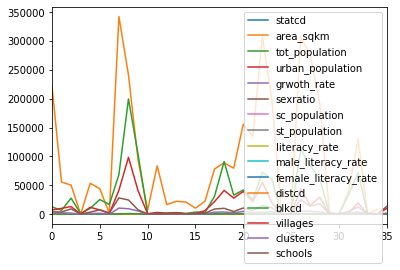

In [10]:
# visualization of data
df.plot(sharex=False,sharey=True)
pyplot.show()

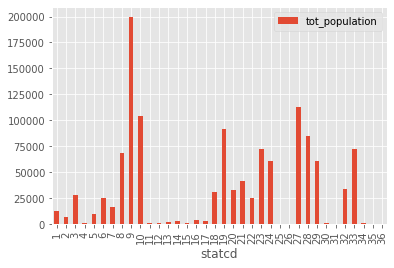

In [11]:
pyplot.style.use('ggplot')
df.plot('statcd','tot_population',kind='bar')
pyplot.show()

In [12]:
import seaborn as sns

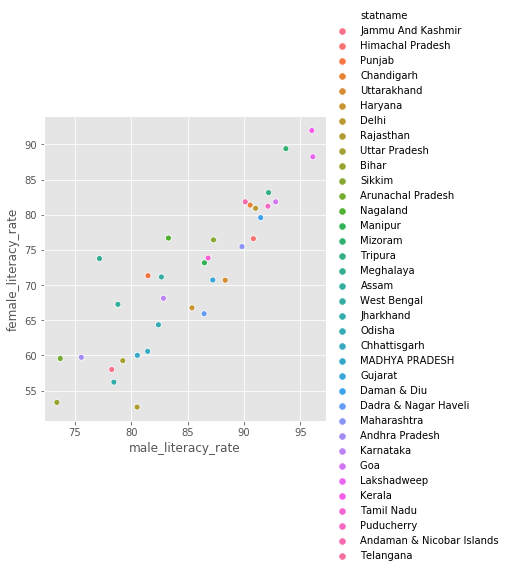

In [13]:
sns.relplot(x='male_literacy_rate',y='female_literacy_rate',hue='statname',data=df)

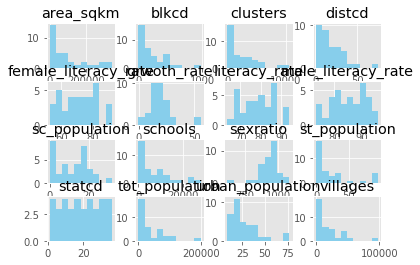

In [14]:
#plotting histogram
df.hist(color='skyblue')
pyplot.show()

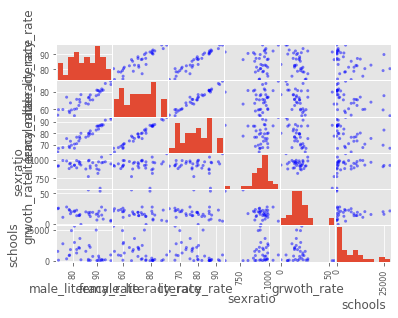

In [15]:
# multivatiate plot
from pandas.plotting import scatter_matrix
datas=df[['male_literacy_rate','female_literacy_rate','literacy_rate','sexratio','statname','grwoth_rate','schools']].copy()
scatter_matrix(datas,color='blue')
pyplot.show()

In [16]:
datas=df[['male_literacy_rate','female_literacy_rate','literacy_rate','sexratio','grwoth_rate','schools']].copy()
datas=datas.fillna(datas.mean())
datas=datas.round(2)
datas.head()

,male_literacy_rate,female_literacy_rate,literacy_rate,sexratio,grwoth_rate,schools
0,78.26,58.01,68.74,883.0,23.71,4202
1,90.83,76.60,83.78,974.0,12.81,3782
2,81.48,71.34,76.68,893.0,13.73,9171
3,90.54,81.38,86.43,818.0,17.10,160
4,88.33,70.70,79.63,963.0,19.17,3512


In [17]:
dataframe=datas.iloc[:,:]
dataframe.head()

,male_literacy_rate,female_literacy_rate,literacy_rate,sexratio,grwoth_rate,schools
0,78.26,58.01,68.74,883.0,23.71,4202
1,90.83,76.60,83.78,974.0,12.81,3782
2,81.48,71.34,76.68,893.0,13.73,9171
3,90.54,81.38,86.43,818.0,17.10,160
4,88.33,70.70,79.63,963.0,19.17,3512


In [18]:
# splitting datas for training and testing
from sklearn.model_selection import train_test_split
x=dataframe.iloc[:,0:6]
y=dataframe.iloc[:,2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [19]:
#importing the regression model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()


In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
prediction=LR.predict(x_test)
prediction

array([92.28, 86.27, 75.6 , 86.43, 67.63, 73.18, 71.04, 79.31])

In [22]:
s=0
for i in prediction:
    s+=i
percentage=(s/8)
percentage

78.96750000000002